# Imports

In [100]:
import os
import sys
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('..')
from db_connection.connection import PostgresConnection
from src.df_cleaner import *
from src.df_outlier_handler import OutlierHandler

In [97]:
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [78]:
df = pd.read_excel("C:/Users/hp/Documents/10 academy/Week 4/data/BANKS AD DATA.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21 non-null     object
 1   Post link    21 non-null     object
 2   View         21 non-null     int64 
 3   Post Hour    21 non-null     object
 4   Bank         21 non-null     object
 5   Time of day  21 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB


# General Statistics

In [79]:
df.size

126

In [80]:
df.shape

(21, 6)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21 non-null     object
 1   Post link    21 non-null     object
 2   View         21 non-null     int64 
 3   Post Hour    21 non-null     object
 4   Bank         21 non-null     object
 5   Time of day  21 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB


In [82]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns, excluding NaN values
df.describe()

,View
count,21.000000
mean,226880.952381
std,39312.524964
min,129400.000000
25%,212300.000000
50%,232100.000000
75%,255900.000000
max,299100.000000


# Missing Values

In [83]:
percent_missing_values(df)

The dataset contains 0.0 % missing values.


# Univariate Analysis

In [84]:
unique_counts = df['View'].nunique()
unique_counts

21

# Experiment

In [85]:
counts_df = df['View'].value_counts()
counts_df

View
239800    1
259400    1
170200    1
213300    1
213700    1
207900    1
206900    1
212300    1
218400    1
245600    1
249700    1
258400    1
299100    1
129400    1
244100    1
232100    1
259100    1
255900    1
219400    1
269400    1
160400    1
Name: count, dtype: int64

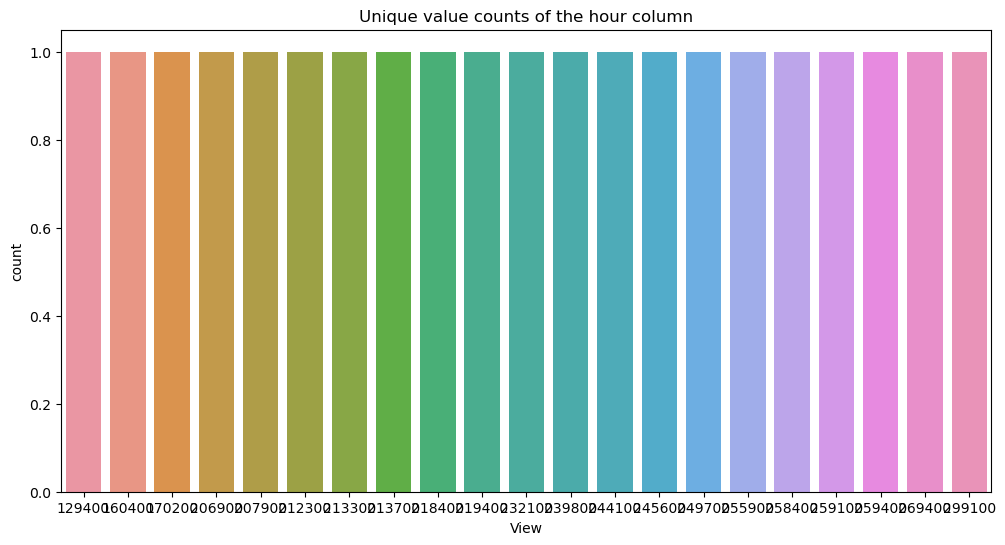

In [86]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of the hour column')
sns.countplot(data=df, x='View')
plt.show()

# Date

In [87]:
# unique value counts
counts_df = df['Date'].value_counts()
counts_df

Date
26/9/2023              1
2022-03-03 00:00:00    1
2018-06-12 00:00:00    1
16/12/2021             1
23/12/2021             1
30/12/2021             1
20/1/2022              1
2022-03-02 00:00:00    1
17/2/2022              1
24/2/2022              1
17/3/2022              1
19/9/2023              1
25/1/2023              1
26/1/2023              1
2023-05-03 00:00:00    1
29/8/2023              1
2023-01-09 00:00:00    1
2023-05-09 00:00:00    1
2023-08-09 00:00:00    1
15/9/2023              1
23/5/2018              1
Name: count, dtype: int64

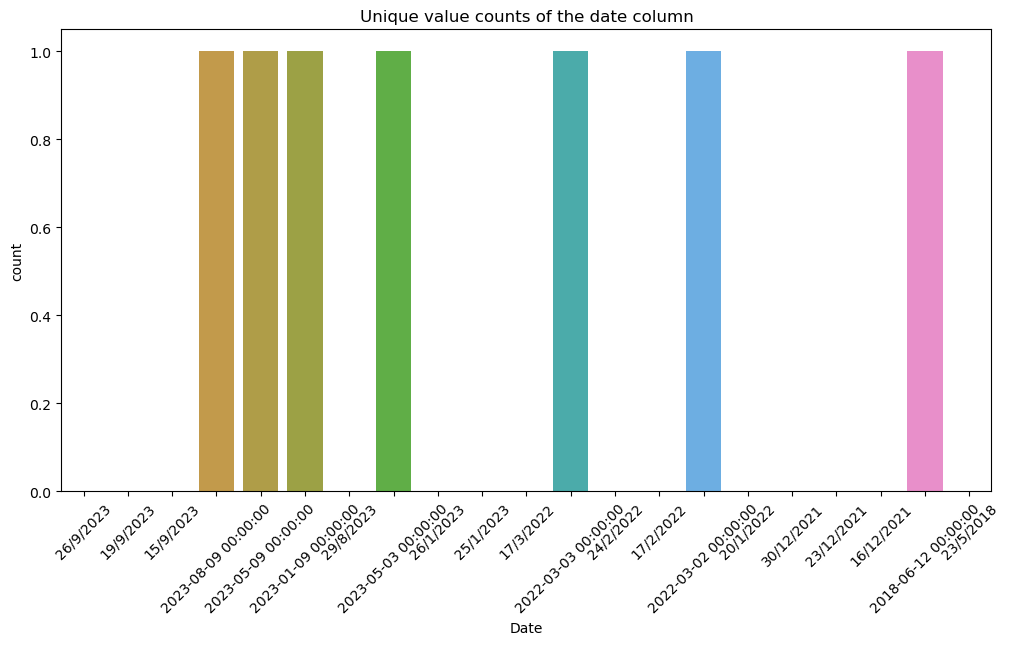

In [88]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of the date column');
sns.countplot(data=df, x='Date')
plt.xticks(rotation=45)
plt.show()

# Post Hour

In [89]:
# unique value counts
counts_df = df['Post Hour'].value_counts()
counts_df

Post Hour
10:18:00    1
05:30:00    1
07:47:00    1
04:57:00    1
03:13:00    1
03:16:00    1
04:21:00    1
03:10:00    1
02:23:00    1
04:11:00    1
04:43:00    1
06:53:00    1
11:38:00    1
09:49:00    1
09:32:00    1
09:02:00    1
10:20:00    1
01:19:00    1
10:50:00    1
03:56:00    1
08:11:00    1
Name: count, dtype: int64

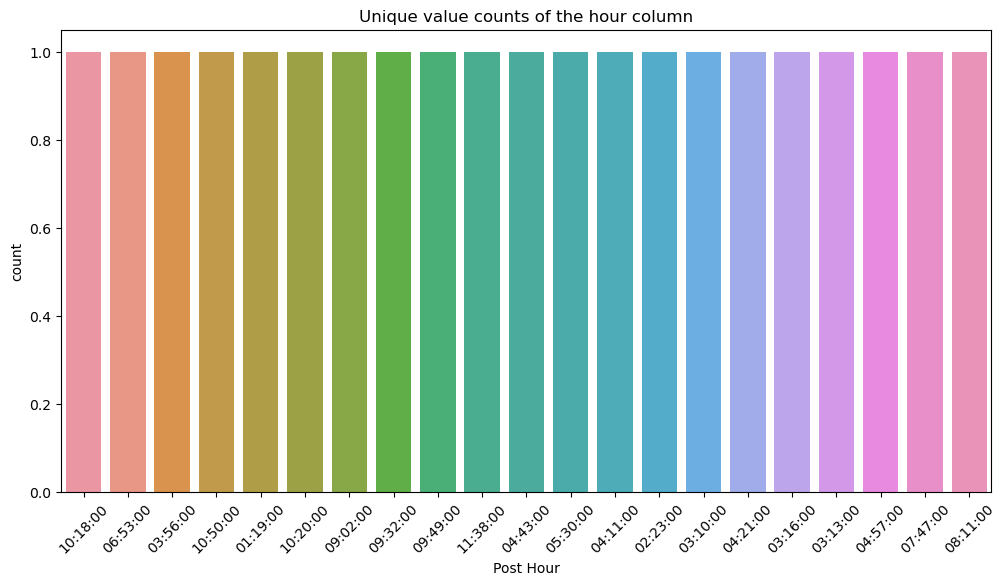

In [90]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of the hour column')
sns.countplot(data=df, x='Post Hour')
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis

# View and Time of day

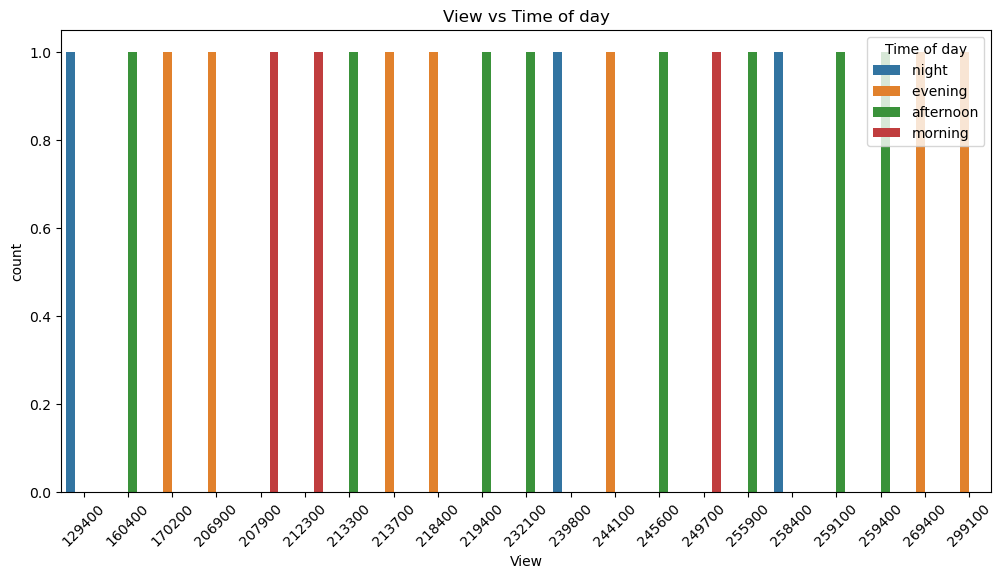

In [92]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="View", hue="Time of day")
plt.title('View vs Time of day')
plt.xticks(rotation=45)
plt.show()



# View and Post link

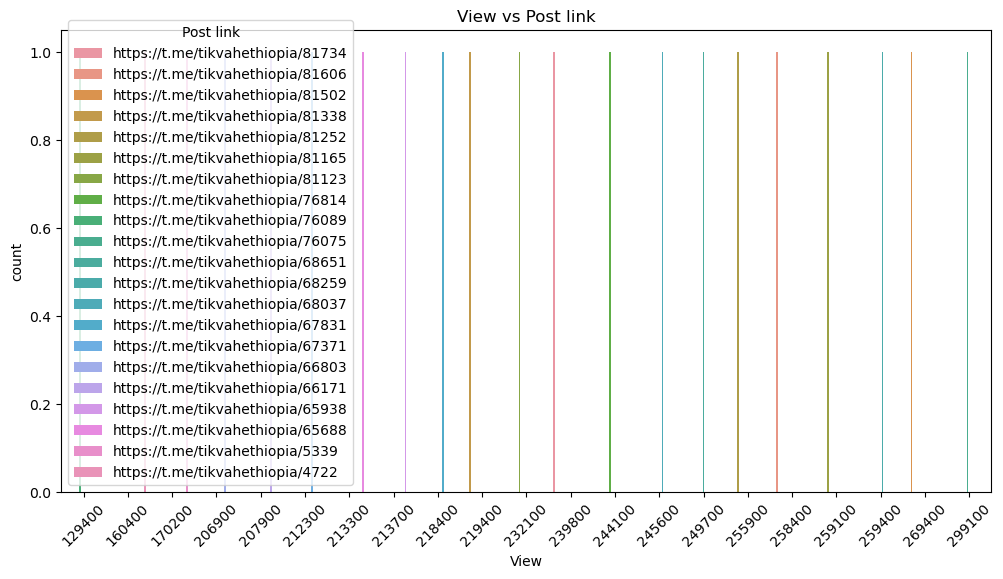

In [93]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="View", hue="Post link")
plt.title('View vs Post link')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis

In [72]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlation for the numerical columns')
plt.show()

# Outliers

In [106]:
user_engagement_df = df[['Post link', 'View', 'Post Hour', 'Bank','Time of day']]
user_engagement_df.head()


,Post link,View,Post Hour,Bank,Time of day
0,https://t.me/tikvahethiopia/81734,239800,10:18:00,BOA,night
1,https://t.me/tikvahethiopia/81606,258400,06:53:00,BOA,night
2,https://t.me/tikvahethiopia/81502,269400,03:56:00,BOA,evening
3,https://t.me/tikvahethiopia/81338,219400,10:50:00,BOA,afternoon
4,https://t.me/tikvahethiopia/81252,255900,01:19:00,BOA,afternoon


In [107]:
outlier_handler = OutlierHandler(user_engagement_df)


<Axes: >

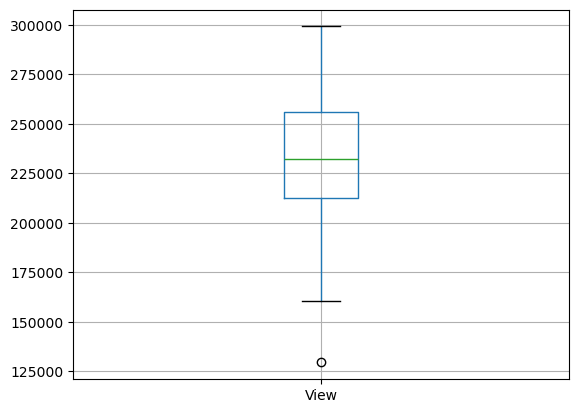

In [108]:
user_engagement_df.boxplot()